# Visualization of images and sum of an area

Visualize the image in an array using the jupyter widget.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

In [2]:
# test data
DATA = xr.load_dataset("data/grid_scan.nc")

In [3]:
# image array
IMAGES = DATA["pe1_image"]
SUMMED = DATA.drop("pe1_image")
maxVal = IMAGES.max()

In [4]:
# widgets
index_widget = widgets.IntSlider(min=0, max=IMAGES.shape[0] - 1, step=1)
xlim_widget = widgets.IntRangeSlider(min=0, max=IMAGES.shape[1] - 1, step=1)
ylim_widget = widgets.IntRangeSlider(min=0, max=IMAGES.shape[2] - 1, step=1)
vlim_widget = widgets.FloatRangeSlider(min=0., max=maxVal)

In [5]:
def processData(label: str):
    """Process the images and save the data in the NEWDATA."""
    r0, r1 = ylim_widget.value
    c0, c1 = xlim_widget.value
    SUMMED.update({label: (["time"], [np.sum(image[r0:r1+1][c0:c1+1]) for image in IMAGES])})

In [6]:
@interact(
    index=index_widget,
    xlim=xlim_widget,
    ylim=ylim_widget,
    vlim=vlim_widget
)
def visImageWtihMask(index, xlim, ylim, vlim, **kwargs):
    vmin, vmax = vlim
    x0, x1 = xlim
    y0, y1 = ylim
    facet = IMAGES[index].plot.imshow(aspect=1.2, size=10, vmin=vmin, vmax=vmax, **kwargs)
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, facecolor='none', edgecolor='r')
    facet.axes.add_patch(rect)
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=8), IntRangeSlider(value=(511, 1535), descri…

In [7]:
def reshape(arr: xr.DataArray, *args):
    values = arr.values.reshape(args[1::2])
    dims = args[::2]
    return xr.DataArray(values, dims=dims)

In [8]:
processData("pe1_image_sum")

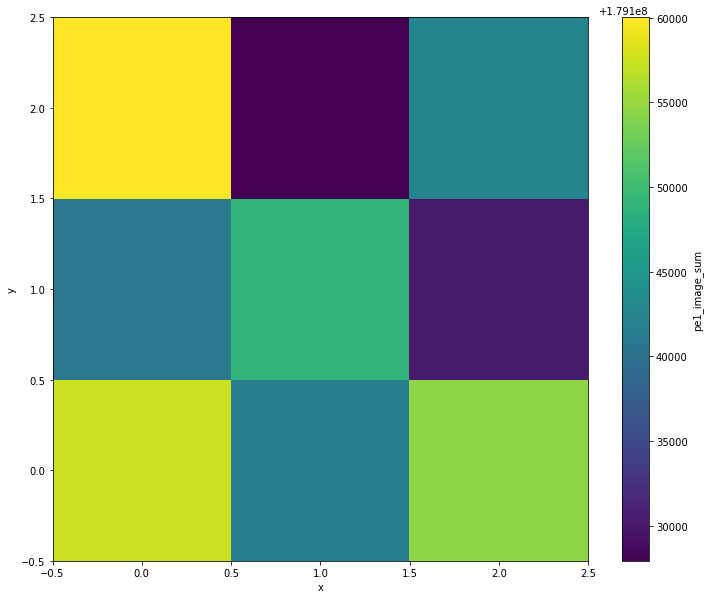

In [9]:
RESHAPED = SUMMED.map(reshape, args=("y", 3, "x", 3))
RESHAPED['pe1_image_sum'].plot.pcolormesh(aspect=1.2, size=10)
plt.show()